Kernels:
  Kernel count: 1
  Intermediate buffers: 0
  Host readbacks: 0
  Host writes: 0
  Lines of generated code: 437
  IR Compile time: 0.822500 ms
  Compiler time: 1475.694824 ms



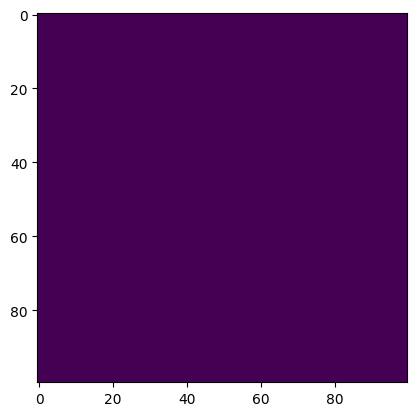

In [4]:
import numpy as np
import TensorFrost as tf
import matplotlib.pyplot as plt

tf.initialize(tf.opengl)

def Kernels():
    A = tf.input([-1, -1], tf.float32)
    B = tf.input(A.shape, tf.float32)

    C = tf.buffer(A.shape, tf.float32)
    
    with tf.kernel(A.shape) as (i, j):
        C[i, j] = A[i, j] + B[i, j]

    return [C]

kern = tf.compile(Kernels)

A = tf.tensor(np.random.rand(100, 100).astype(np.float32))
B = tf.tensor(np.random.rand(100, 100).astype(np.float32))

C, = kern(A, B)

plt.imshow(C.numpy - (A.numpy + B.numpy))
plt.show()
